# Wykład Specjalizujący DSiP
# Zadanie 2 Regresja
## Mateusz Baran
### 155620

In [344]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [345]:
data = pd.read_csv('data_weather.csv', skiprows=[0,1,2,3])  # usuwa pierwsze 4 wiersze z pliku csv
data.columns = ['Data', 'Temperatura', 'Anomalia']  # zmiana nazw kolumn na nazwy polskie

In [346]:
data.head()

,Data,Temperatura,Anomalia
0,199901,34.2,0.5
1,200001,31.6,-2.2
2,200101,33.9,0.2
3,200201,40.2,6.5
4,200301,27.8,-5.9


In [347]:
data['Temperatura'] = data['Temperatura'].apply(lambda temp: (temp - 32) * 5/9)   # zmiana stopni F and stopnie C
data['Anomalia'] = data['Anomalia'].apply(lambda temp: (temp - 32) * 5/9)   # zmiana stopni F and stopnie C

In [348]:
data

,Data,Temperatura,Anomalia
0,199901,1.222222,-17.500000
1,200001,-0.222222,-19.000000
2,200101,1.055556,-17.666667
3,200201,4.555556,-14.166667
4,200301,-2.333333,-21.055556
5,200401,-3.888889,-22.611111
6,200501,-0.222222,-18.944444
7,200601,5.055556,-13.666667
8,200701,3.166667,-15.555556
9,200801,2.666667,-16.055556


In [349]:
data[['Temperatura', 'Anomalia']].describe()

,Temperatura,Anomalia
count,25.000000,25.000000
mean,1.073333,-17.651111
std,2.551412,2.552611
min,-3.888889,-22.611111
25%,-0.888889,-19.611111
50%,1.055556,-17.666667
75%,3.166667,-15.555556
max,6.388889,-12.333333


In [350]:
x = data['Data']
y = data['Temperatura']
linear_regression = stats.linregress(x, y)  # regresja liniowa z biblioteki scipy

In [351]:
print(f'Nachylenie linii regresji: {linear_regression.slope}')

Nachylenie linii regresji: 0.0006619658119658117


In [352]:
print(f'Przesunięcie linii regresji: {linear_regression.intercept}')

Przesunięcie linii regresji: -132.04865341880338


In [353]:
print(f'Błąd  regresji: {linear_regression.stderr}')

Błąd  regresji: 0.0007095531966769347


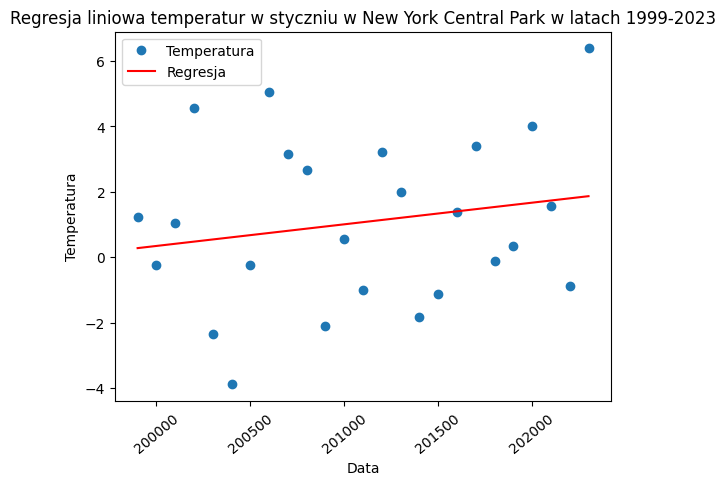

In [354]:
plt.plot(x, y, 'o', label='Temperatura')
plt.xlabel('Data')
plt.xticks(rotation=40)
plt.ylabel('Temperatura')
plt.plot(x, linear_regression.intercept + linear_regression.slope* x, 'r', label='Regresja')
plt.title('Regresja liniowa temperatur w styczniu w New York Central Park w latach 1999-2023')
plt.legend()
plt.show()